Importing dependencies.

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

Downloading MNIST data from Pytorch. Splitting in train and test.

In [59]:
train = datasets.MNIST("", train =True, download=True, transform=transforms.Compose([transforms.ToTensor()]))  

test = datasets.MNIST("", train =False, download=True, transform=transforms.Compose([transforms.ToTensor()]))  

Configuring training and testing dataset to batch size value of 10.

In [60]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

Displaying first batch object from trainset. Output is a list of tensors of size (1, 28, 28) plus a list of labels as int scalars.

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Picking one datapoint and label from the dataset. 

In [61]:
x, y = data[0][0], data[1][0]

print(y, x)


tensor(0) tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.000

Displaying first feature (digit) using matplotlib imshow().

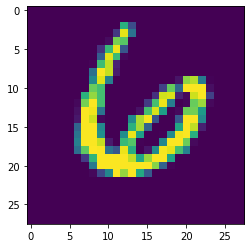

In [49]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

Getting shape of first feature.

In [7]:
data[0][0].shape

torch.Size([1, 28, 28])

Counting labels in trainset to check for data imbalance. Labels are counted using a dictionary with keys representing possible label values.

In [15]:
total = 0

counter_dict = {0 :0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total +=1

Displaying label count. Data does not seem to be imbalanced.

In [16]:
counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

Transforming image label counts in ratios.

In [17]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Importing dependencies for building Feedforward neural network.

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Net (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()

print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [38]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) #array of any size  

In [39]:
output = net(X)

In [46]:
output

tensor([[-2.3815, -2.1249, -2.4187, -2.3690, -2.2442, -2.2488, -2.2980, -2.3912,
         -2.2502, -2.3367]], grad_fn=<LogSoftmaxBackward>)

In [50]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 1e-3) 

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y) #used because label is a scaller, use mean-squared for one-hot
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0583, grad_fn=<NllLossBackward>)
tensor(0.1984, grad_fn=<NllLossBackward>)
tensor(0.0097, grad_fn=<NllLossBackward>)


In [53]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print(f"Accuracy: {round(correct/total, 3)}")

Accuracy: 0.976


<function matplotlib.pyplot.show(*args, **kw)>

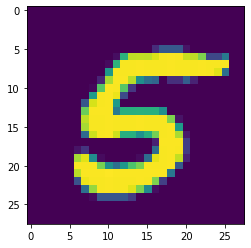

In [58]:
plt.imshow(X[1].view(28, 28))
plt.show

In [57]:
print(torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(5, grad_fn=<NotImplemented>)


In [63]:
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print(f"Accuracy: {round(correct/total, 3)}")

Accuracy: 0.975
